In [1]:
import matplotlib.pyplot as plt
import numpy as np

import hypernetx as hnx
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)

<module 'hypernetx.drawing.draw_bipartite' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_bipartite.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

# Visualization

## Basic Euler Visualization
Use the default drawing tool to visualize `H`. This renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. It is not always possible to render a "correct" Euler diagram for an arbitrary hypergraph. This technique will lead to false positives, cases where a hyper edge incorrectly contains a vertex not belonging to its set.

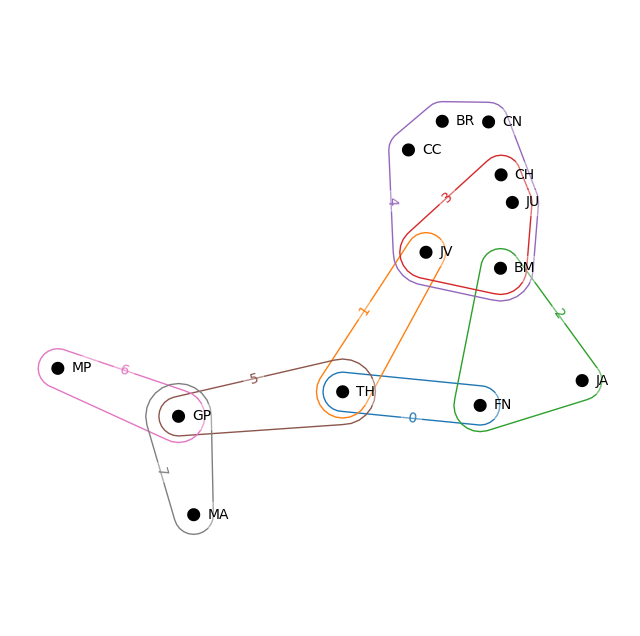

In [3]:
hnx.draw(H)

## Advanced Visualization Parameters

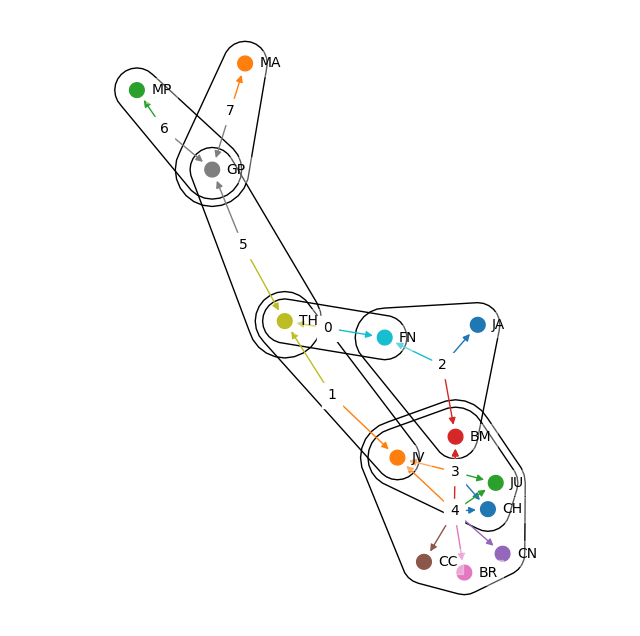

In [4]:
from collections import defaultdict 
import networkx as nx

scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

colors = defaultdict(lambda: plt.cm.tab10(len(colors)%10))

def get_node_color(v):
    return colors[v]

def get_cell_color(e):
    return get_node_color(e[1])

hnx.draw(
    H,
    with_additional_edges=nx.DiGraph(H.incidences.items),
    edges_kwargs={'edgecolors': 'black'},
    nodes_kwargs={'color': get_node_color},
    additional_edges_kwargs={'edge_color': get_cell_color},
    edge_labels_on_edge=False, edge_label_alpha=1
)

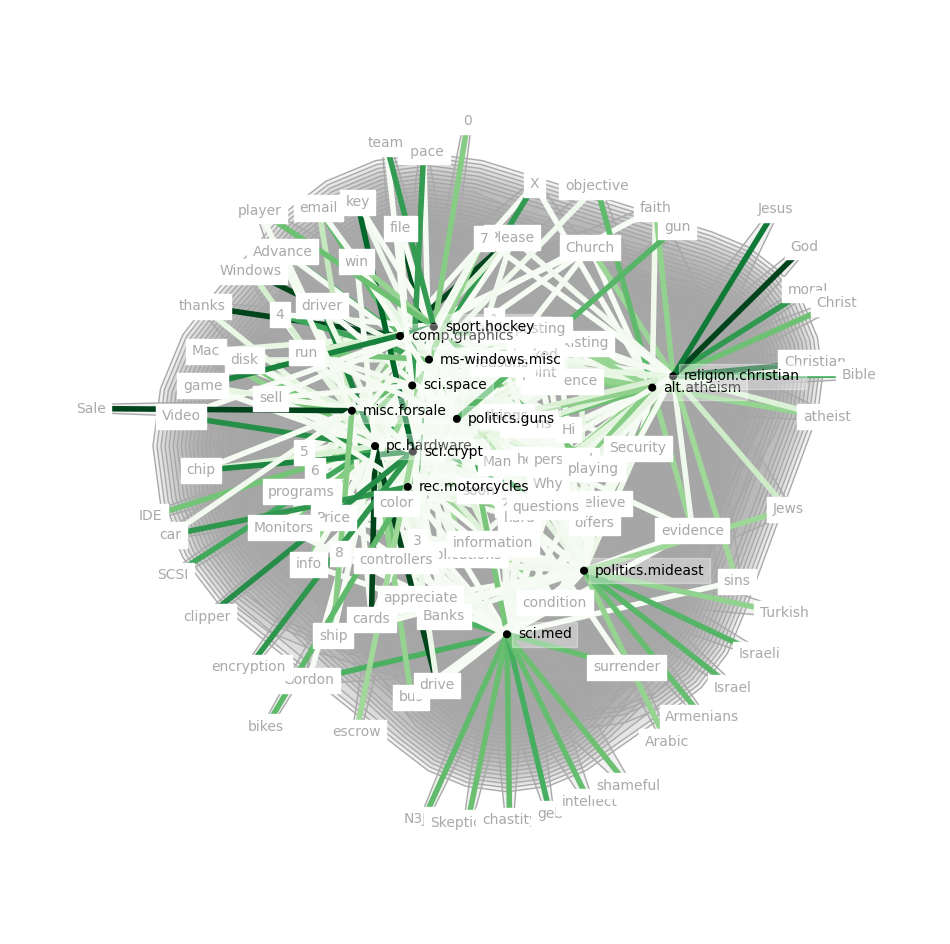

In [5]:
import pandas as pd
### A very busy hypergraph

filepath = '../data/newsgroups-topics.csv'

## uncomment the filepath below to run in Colab
# filepath = 'https://raw.githubusercontent.com/pnnl/HyperNetX/master/tutorials/data/newsgroups-topics.csv'

df = pd.read_csv(filepath, index_col=0)
df.index = df.index.map(lambda s: '.'.join(s.split('.')[-2:]))

H = hnx.Hypergraph.from_incidence_dataframe(df)
# create functions for mapping hyper edges/weights to colors
norm = plt.Normalize(0, H.incidence_matrix().max().max())
cmap = plt.cm.Greens

def get_cell_color(e):
    return cmap(norm(H.incidences[e].weight))

plt.figure(figsize=(12, 12))
hnx.draw(
    H,
    layout=nx.kamada_kawai_layout,
    with_additional_edges=H.bipartite(),
    edges_kwargs={
        'edgecolors': 'darkgray',
        'facecolors': (.65, .65, .65, .15)
    },
    additional_edges_kwargs={
        'edge_color': get_cell_color,
        'width': 4,
    },
    edge_labels_on_edge=False, edge_label_alpha=1,
    contain_hyper_edges=True
)

/var/folders/7r/kf6yf34j2qj1ccysp03c77y8z29rvs/T/ipykernel_41635/4265805769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[newdf < threshold] = None
/var/folders/7r/kf6yf34j2qj1ccysp03c77y8z29rvs/T/ipykernel_41635/4265805769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[newdf < threshold] = None


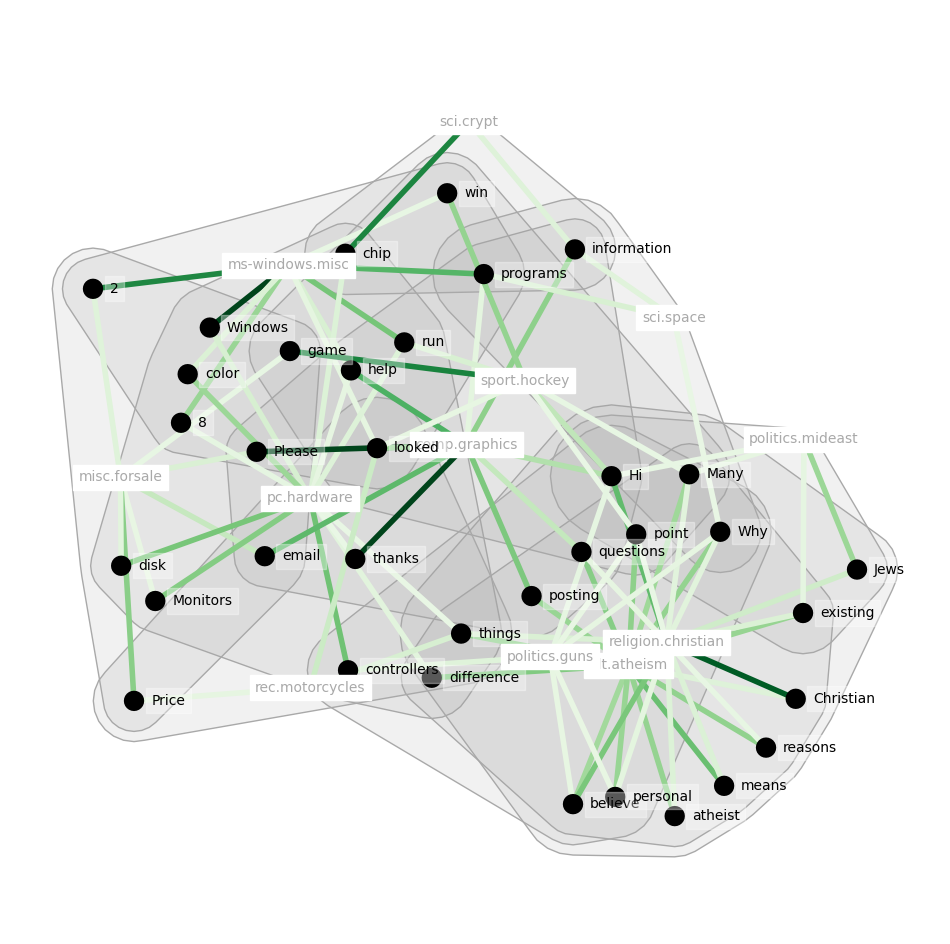

In [6]:
## Let's take a subhypergraph focusing on the most interesting edges

threshold = 0.1

# filter out singletons
newdf = df[df.columns[(df >= threshold).sum(axis=0) > 1]]

# filter out small weights
newdf[newdf < threshold] = None

# construct hypergraph
H2 = hnx.Hypergraph.from_incidence_dataframe(newdf.T)
norm = plt.Normalize(0, H2.incidence_matrix().max().max())
cmap = plt.cm.Greens

def get_cell_color(e):
    return cmap(norm(H2.incidences[e].weight))

plt.figure(figsize=(12, 12))
hnx.draw(
    H2,
    layout=nx.kamada_kawai_layout,
    with_additional_edges=H2.bipartite(),
    edges_kwargs={
        'edgecolors': 'darkgray',
        'facecolors': (.65, .65, .65, .15)
    },
    additional_edges_kwargs={
        'edge_color': get_cell_color,
        'width': 4,
    },
    edge_labels_on_edge=False, edge_label_alpha=1,
    contain_hyper_edges=True
)